In [82]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM

In [83]:
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [84]:
from textblob import TextBlob
from googletrans import Translator

In [85]:
data = pd.read_csv('Data_Final.csv')
data.head()

,text_clean,Label,Unnamed: 2
0,awalnya korban penipuan tiket konser coldplay ...,Negatif,NaN
1,pasangan suami istri pelaku penipuan tiket kon...,Negatif,NaN
2,thread polisi menerima laporan dari korban p...,Negatif,NaN
3,gsp awalnya korban penipuan tiket konser coldp...,Negatif,NaN
4,subdit siber dit reskrimum polda metro jaya me...,Negatif,NaN


In [86]:
data.drop(['Unnamed: 2'], axis=1, inplace = True)

In [87]:
data.head()

,text_clean,Label
0,awalnya korban penipuan tiket konser coldplay ...,Negatif
1,pasangan suami istri pelaku penipuan tiket kon...,Negatif
2,thread polisi menerima laporan dari korban p...,Negatif
3,gsp awalnya korban penipuan tiket konser coldp...,Negatif
4,subdit siber dit reskrimum polda metro jaya me...,Negatif


In [88]:
data.shape

(1162, 2)

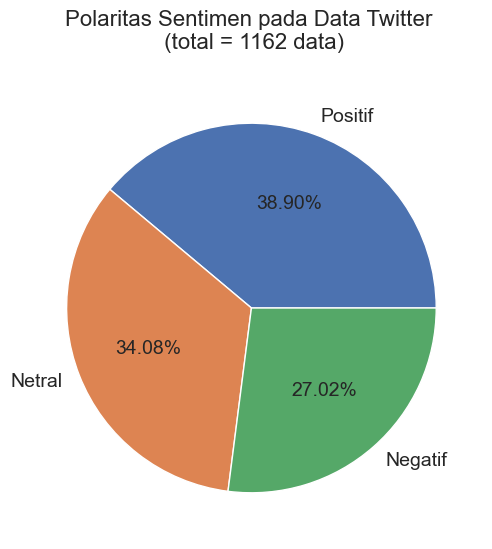

In [89]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data['Label'].value_counts()]
labels = list(data['Label'].value_counts().index)
explode = (0.1, 0, 0)
plt.pie(x = sizes, labels = labels, autopct = '%1.2f%%', explode = None, textprops={'fontsize': 14})
ax.set_title('Polaritas Sentimen pada Data Twitter \n (total = 1162 data)', fontsize = 16, pad = 20)
plt.show()

In [90]:
label_count = data.Label.value_counts()
label_count

Positif    452
Netral     396
Negatif    314
Name: Label, dtype: int64

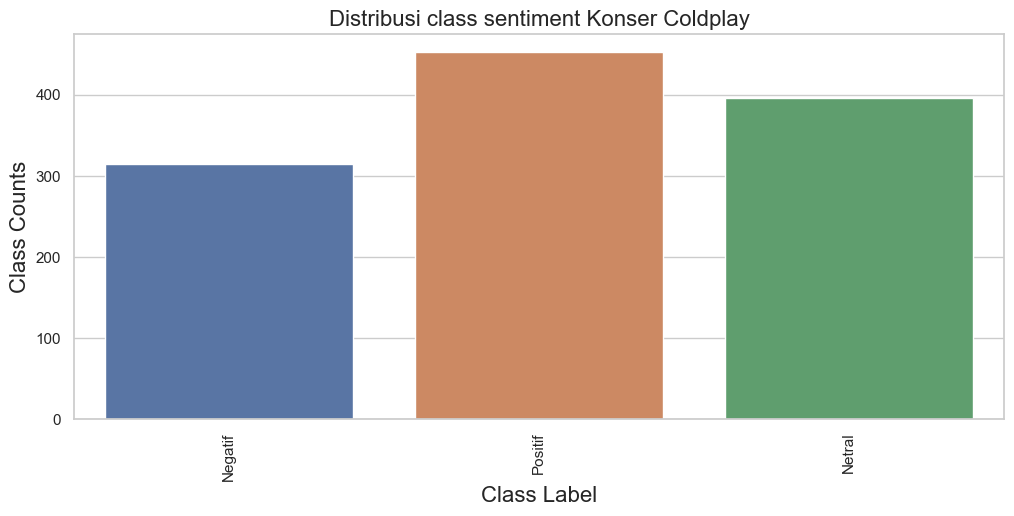

In [91]:
# Cek jumlah review positive ,negative, dan netral
plt.figure(figsize=(12,5))
sns.countplot(x='Label', data=data)
plt.title('Distribusi class sentiment Konser Coldplay', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

PROSES TF-IDF

In [92]:
data.head()

,text_clean,Label
0,awalnya korban penipuan tiket konser coldplay ...,Negatif
1,pasangan suami istri pelaku penipuan tiket kon...,Negatif
2,thread polisi menerima laporan dari korban p...,Negatif
3,gsp awalnya korban penipuan tiket konser coldp...,Negatif
4,subdit siber dit reskrimum polda metro jaya me...,Negatif


In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
text_tfidf = tfidf.fit_transform(data['text_clean'].astype('U'))
text_tfidf

<1162x4809 sparse matrix of type '<class 'numpy.float64'>'
	with 20445 stored elements in Compressed Sparse Row format>

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["Positif", "Negatif", "Netral"])
X = data.iloc[:,0].values
y = le.transform(data.iloc[:, 1].values)
print(X.shape)
print(X[0])
print(y.shape)
print(y[0])

(1162,)
awalnya korban penipuan tiket konser coldplay hanya  orang kemudian bertambah menjadi  orang dengan nilai kerugian yang awalnya rp juta skrng menjadi rp juta
(1162,)
0


SPLITTING DATA

In [95]:
# Membuat objek TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Mengubah data teks menjadi representasi TF-IDF
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'),ngram_range=(1,3))
text_tfidf = tfidfconverter.fit_transform(data['text_clean'])
# X_train, X_test, y_train, y_test = train_test_split(text_tfidf, data['Label'], train_size = 0.8, test_size = 0.2, random_state = 42)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(text_tfidf, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [97]:
print(text_tfidf)

  (0, 1008)	0.08980049084447408
  (0, 810)	0.16433918341583348
  (0, 566)	0.21314481307542432
  (0, 871)	0.40922354876771316
  (0, 530)	0.05647046427365089
  (0, 1007)	0.08318894915924624
  (0, 809)	0.1601327347443716
  (0, 564)	0.19174503189088496
  (0, 453)	0.3512755473977016
  (0, 870)	0.38722154834561884
  (0, 1108)	0.10333140728975818
  (0, 512)	0.21314481307542432
  (0, 257)	0.1473799718626328
  (0, 666)	0.3834900637817699
  (0, 758)	0.3019352267531824
  (0, 379)	0.19361077417280942
  (0, 1001)	0.0703678847102379
  (0, 802)	0.13695402205584306
  (0, 563)	0.17008599458613852
  (1, 840)	0.22151960368620918
  (1, 787)	0.21607083957615128
  (1, 780)	0.21135090541488857
  (1, 685)	0.22151960368620918
  (1, 839)	0.22151960368620918
  (1, 786)	0.20718762843046437
  :	:
  (1158, 398)	0.311547300478798
  (1158, 530)	0.09344861251573586
  (1158, 1001)	0.11644638088989917
  (1159, 465)	0.5291380631421518
  (1159, 366)	0.47555302265700716
  (1159, 464)	0.31404050288661833
  (1159, 76)	0.4523

In [120]:
# ALgoritma Naive Bayes MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print(f"MultinomialNB Accuracy: {accuracy_score(y_test, predicted)*100:.2f}%", )
print("MultinomialNB Precision: ", precision_score(y_test, predicted, average = "macro"))
print("MultinomialNB Recall: ", recall_score(y_test, predicted, average = "macro"))
print("MultinomialNB F1 Score: ", f1_score(y_test, predicted, average = "macro"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print("----------------------------------------------------------")
print(classification_report(y_test, predicted, zero_division = 0))

MultinomialNB Accuracy: 57.51%
MultinomialNB Precision:  0.5906763101129299
MultinomialNB Recall:  0.5506134271311819
MultinomialNB F1 Score:  0.5595618501796991
confusion matrix:
 [[24 13 18]
 [ 4 40 37]
 [ 9 18 70]]
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.44      0.52        55
           1       0.56      0.49      0.53        81
           2       0.56      0.72      0.63        97

    accuracy                           0.58       233
   macro avg       0.59      0.55      0.56       233
weighted avg       0.58      0.58      0.57       233



In [99]:
# ALgoritma Naive Bayes BernoulliNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf2 = BernoulliNB().fit(X_train, y_train)
predicted = clf2.predict(X_test)

print("BernoulliNB Accuracy: ", accuracy_score(y_test, predicted))
print("BernoulliNB Precision: ", precision_score(y_test, predicted, average = "macro"))
print("BernoulliNB Recall: ", recall_score(y_test, predicted, average = "macro"))
print("BernoulliNB F1 Score: ", f1_score(y_test, predicted, average = "macro"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print("----------------------------------------------------------")
print(classification_report(y_test, predicted, zero_division = 0))

BernoulliNB Accuracy:  0.5450643776824035
BernoulliNB Precision:  0.589408463876549
BernoulliNB Recall:  0.5372372059657282
BernoulliNB F1 Score:  0.5505568395620752
confusion matrix:
 [[26 18 11]
 [ 3 48 30]
 [ 6 38 53]]
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.47      0.58        55
           1       0.46      0.59      0.52        81
           2       0.56      0.55      0.55        97

    accuracy                           0.55       233
   macro avg       0.59      0.54      0.55       233
weighted avg       0.57      0.55      0.55       233



In [100]:
# ALgoritma Naive Bayes GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf3 = GaussianNB().fit(X_train.toarray(), y_train)
predicted = clf3.predict(X_test.toarray())

print("GaussianNB Accuracy: ", accuracy_score(y_test, predicted))
print("GaussianNB Precision: ", precision_score(y_test, predicted, average = "macro"))
print("GaussianNB Recall: ", recall_score(y_test, predicted, average = "macro"))
print("GaussianNB F1 Score: ", f1_score(y_test, predicted, average = "macro"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print("----------------------------------------------------------")
print(classification_report(y_test, predicted, zero_division = 0))

GaussianNB Accuracy:  0.5536480686695279
GaussianNB Precision:  0.5445657697128468
GaussianNB Recall:  0.5479097967070475
GaussianNB F1 Score:  0.5459795321637427
confusion matrix:
 [[29 14 12]
 [14 42 25]
 [16 23 58]]
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.53      0.51        55
           1       0.53      0.52      0.53        81
           2       0.61      0.60      0.60        97

    accuracy                           0.55       233
   macro avg       0.54      0.55      0.55       233
weighted avg       0.56      0.55      0.55       233



1162


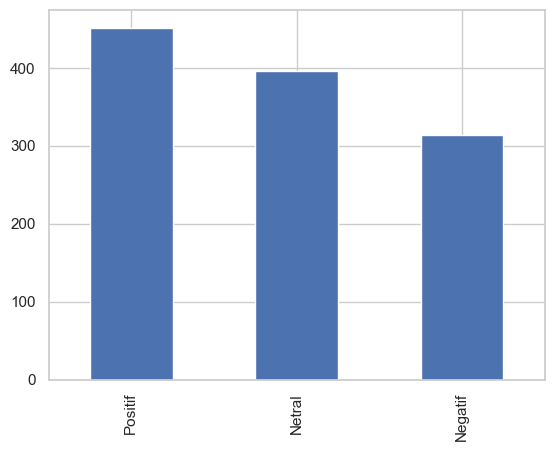

In [101]:
batang = pd.value_counts(data['Label'])
ax = batang.plot.bar()
n = len(data.index)
print(n)

In [102]:
data.head()

,text_clean,Label
0,awalnya korban penipuan tiket konser coldplay ...,Negatif
1,pasangan suami istri pelaku penipuan tiket kon...,Negatif
2,thread polisi menerima laporan dari korban p...,Negatif
3,gsp awalnya korban penipuan tiket konser coldp...,Negatif
4,subdit siber dit reskrimum polda metro jaya me...,Negatif


In [103]:
unique_labels = data['Label'].unique()

print("Label yang tersedia dalam dataset:")
print(unique_labels)

Label yang tersedia dalam dataset:
['Negatif' 'Positif' 'Netral']


In [104]:
if data.isnull().any().any():
    print("Ada baris yang kosong dalam DataFrame")
else:
    print("Tidak ada baris yang kosong dalam DataFrame")
# Mengecek baris ke berapa yang kosong dalam DataFrame
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null_indexes = rows_with_null.index

if len(rows_with_null_indexes) > 0:
    print("Baris ke berapa yang kosong:", rows_with_null_indexes)
else:
    print("Tidak ada baris yang kosong dalam DataFrame")

Tidak ada baris yang kosong dalam DataFrame
Tidak ada baris yang kosong dalam DataFrame


In [105]:
review = "mau nonton konser coldplay"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = clf.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['Positif']


In [107]:
review = "konser coldplay katanya batal?"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = clf.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['Netral']


In [108]:
review = "konser coldplay merusak akhlak"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = clf.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['Negatif']


In [109]:
review = "kena tipu tiket konser coldplay"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = clf.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['Negatif']


In [110]:
data1 = pd.read_csv('Coldplay_clean.csv')

In [111]:
data1.head()

,Unnamed: 0,text_clean,text_preprocessed
0,0,awalnya korban penipuan tiket konser coldplay ...,"['korban', 'tipu', 'tiket', 'konser', 'coldpla..."
1,1,pasangan suami istri pelaku penipuan tiket kon...,"['pasang', 'suami', 'istri', 'laku', 'tipu', '..."
2,2,thread polisi menerima laporan dari korban p...,"['thread', 'polisi', 'terima', 'lapor', 'korba..."
3,3,gsp awalnya korban penipuan tiket konser coldp...,"['gsp', 'korban', 'tipu', 'tiket', 'konser', '..."
4,4,subdit siber dit reskrimum polda metro jaya me...,"['subdit', 'siber', 'dit', 'reskrimum', 'polda..."


In [112]:
data2 = pd.DataFrame(data=data, columns=['text_clean','Label','text_preprocessed'])
data2['text_clean'] = data['text_clean']
data2['Label'] = data['Label']

In [113]:
data2['text_preprocessed'] = data1['text_preprocessed']
data2

,text_clean,Label,text_preprocessed
0,awalnya korban penipuan tiket konser coldplay ...,Negatif,"['korban', 'tipu', 'tiket', 'konser', 'coldpla..."
1,pasangan suami istri pelaku penipuan tiket kon...,Negatif,"['pasang', 'suami', 'istri', 'laku', 'tipu', '..."
2,thread polisi menerima laporan dari korban p...,Negatif,"['thread', 'polisi', 'terima', 'lapor', 'korba..."
3,gsp awalnya korban penipuan tiket konser coldp...,Negatif,"['gsp', 'korban', 'tipu', 'tiket', 'konser', '..."
4,subdit siber dit reskrimum polda metro jaya me...,Negatif,"['subdit', 'siber', 'dit', 'reskrimum', 'polda..."
...,...,...,...
1157,nonton langsung konser coldplay bareng orang m...,Positif,"['yuk', 'gabung', 'trip', 'to', 'konser', 'col..."
1158,kalo kalah war tiket ikut konser coldplay diba...,Positif,"['kait', 'tipu', 'konser', 'coldplay', 'polisi..."
1159,kabarin kalo ada bagi tiket konser coldplay gr...,Positif,"['kalo', 'konser', 'coldplay', 'tiket', 'juta'..."
1160,tetap konser tunggal coldplay whenever whereve...,Positif,"['coldplay', 'gak', 'kerja', 'ta', 'rabu', 'ko..."


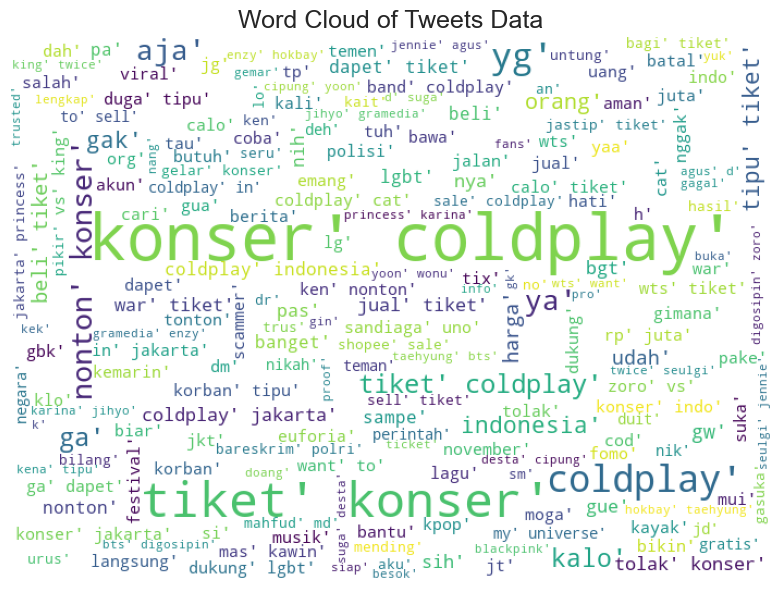

In [114]:
list_kata = ''

for tweet in data2['text_preprocessed']:
  for kata in tweet:
    list_kata += '' + (kata)

wordcloud = WordCloud(width=700, 
                      height=500, 
                      background_color='white',
                      min_font_size=10).generate(list_kata)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

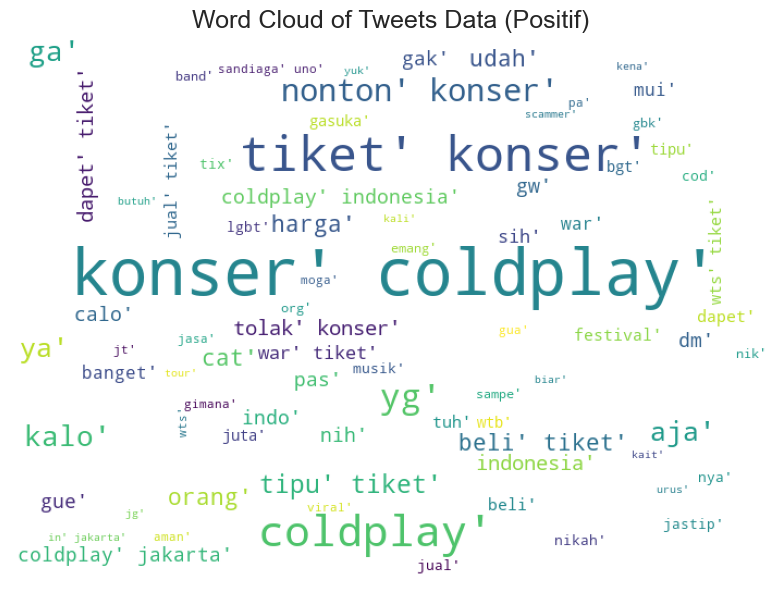

In [115]:
tweets_positive = data2[data2['Label'] == 'Positif' ]

list_kata = ''

for tweet in tweets_positive['text_preprocessed']:
  for word in tweet:
    list_kata += '' + (word)

wordcloud = WordCloud(width=700, 
                      height=500, 
                      background_color='white',
                      min_font_size=10).generate(list_kata)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data (Positif)', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

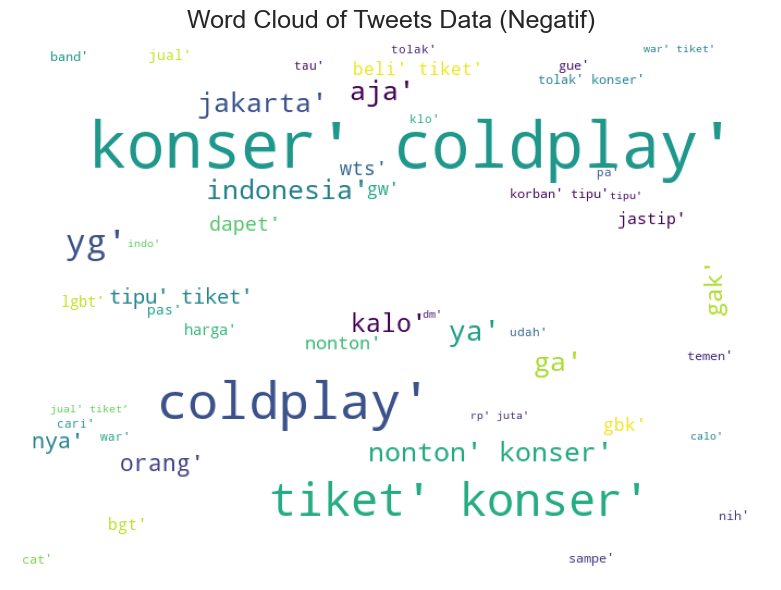

In [116]:
tweets_positive = data2[data2['Label'] == 'Negatif' ]

list_kata = ''

for tweet in tweets_positive['text_preprocessed']:
  for word in tweet:
    list_kata += '' + (word)

wordcloud = WordCloud(width=700, 
                      height=500, 
                      background_color='white',
                      min_font_size=10).generate(list_kata)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data (Negatif)', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

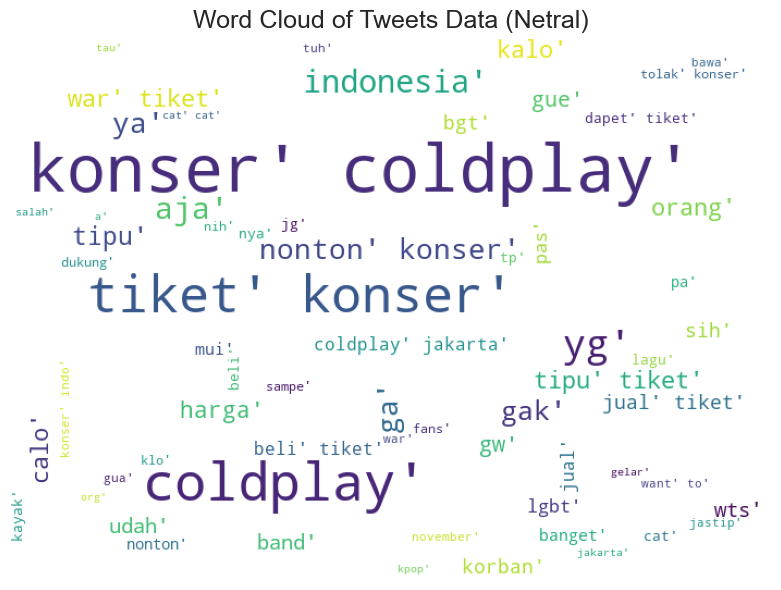

In [117]:
tweets_positive = data2[data2['Label'] == 'Netral' ]

list_kata = ''

for tweet in tweets_positive['text_preprocessed']:
  for word in tweet:
    list_kata += '' + (word)

wordcloud = WordCloud(width=700, 
                      height=500, 
                      background_color='white',
                      min_font_size=10).generate(list_kata)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data (Netral)', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()